## Wondrous Numbers with Unwarranted Comments

In [11]:
import sys
from collections.abc import Iterable
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 6)

In [12]:
def wondrous_while(x):
    steps = []
    while x > 1:
        if x % 2 == 0:
            x = int(x/2)
        else:
            x = x*3 +1
        steps.append(x)
    return steps, len(steps)

In [13]:
wondrous_while(17)

([52, 26, 13, 40, 20, 10, 5, 16, 8, 4, 2, 1], 12)

In [14]:
def flatten_list(x):
    if isinstance(x, Iterable):
        return [a for b in x for a in flatten_list(b)]
    else:
        return [x]

def wondrous_numbers(n, m=None):
    """Given a scalar argument x, return a list with the hailstone
    sequence of wondrous numbers for x and the number of operations
    that took to get to 1. 
    
    Assume all natural numbers are wondrous,
    that is, that the Collatz conjecture is true and they all 
    converge to 1.
    """
    if n == 1:
        if isinstance(m, Iterable):
            return m[1:], len(m)-1
        else:
            return [m], len(m)
    else:
        if n % 2 == 0:
            n = int(n/2)
        else:
            n = n*3 +1
        m = flatten_list([m, n])
        return wondrous_numbers(n, m)

In [15]:
wondrous_numbers(17)

([52, 26, 13, 40, 20, 10, 5, 16, 8, 4, 2, 1], 12)

### Plot hailstone sequence

In [16]:
def plot_numops(x):
    steps, step_count = wondrous_while(x)
    if step_count > 0:
        xticks = list(range(1, step_count+1))
        plt.plot(xticks, steps)
        plt.show()

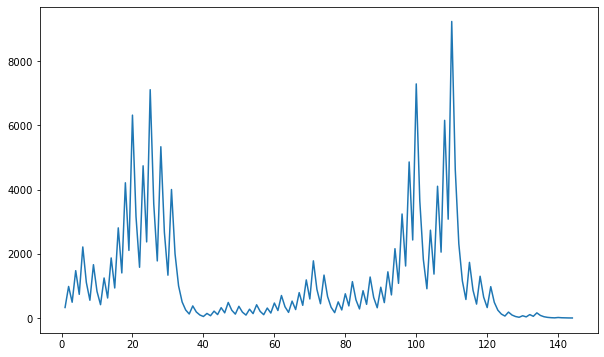

In [17]:
plot_numops(654)

### Plot Sequence Lengths

In [18]:
def get_seqlens(seq):
    """Get a sequence of lengths of the 
    hailstone sequences.
    """
    lens = []
    for x in seq:
        seq, n = wondrous_while(x)
        lens.append(n)
    return lens

def plot_seqlens(n):
    """Plot a range of sequences of lengths.
    """
    lens = get_seqlens(range(1, n))
    plt.plot(lens, '.')
    plt.show()

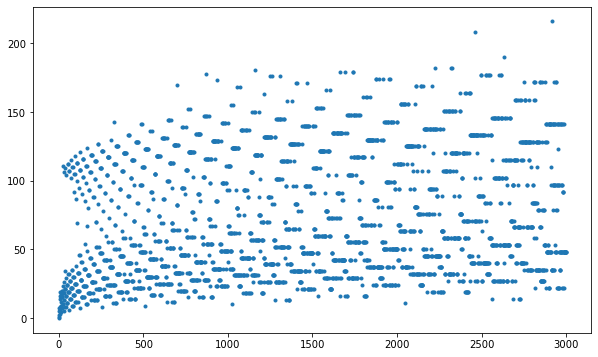

In [19]:
plot_seqlens(3000)

I never asked for the hailstone sequences but since you did that extra credit... wouldn't it be fun to plot it? 

In [20]:
def get_seqseqs(seq):
    """Get a sequence of hailstone sequences.
    """
    seqs = []
    for x in seq:
        seq, n = wondrous_while(x)
        seqs.append(seq)
    return seqs

def plot_seqseqs(n, thresh=100, log=False):
    """Plot the sequence of sequences, above
    a threshold of length. Defaults to 100.
    """
    import numpy as np
    
    seqs = get_seqseqs(range(1, n))
    for seq in seqs:
        if len(seq) > thresh:
            if log:
                seq = np.log(seq)
            plt.plot(seq, '-')

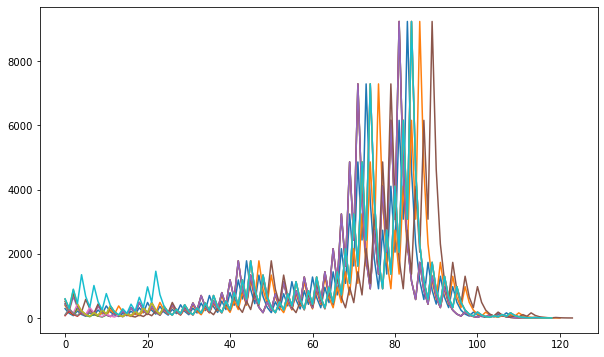

In [30]:
plot_seqseqs(200, thresh=115)

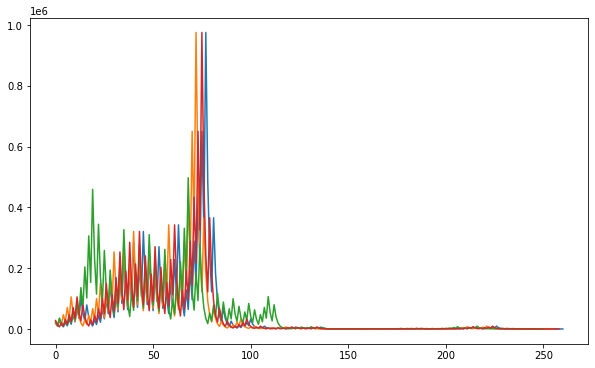

In [31]:
plot_seqseqs(10000, thresh=250)

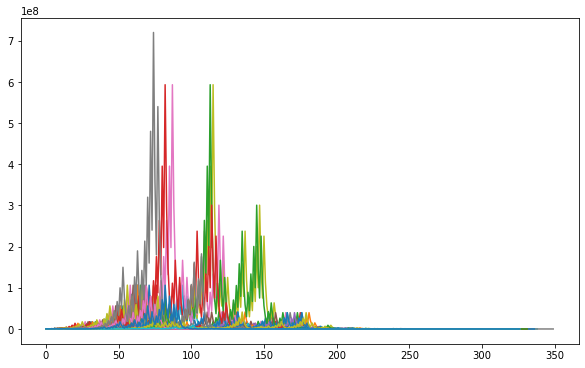

In [32]:
plot_seqseqs(100000, thresh=300)

Woah. Right? Something must be going on in there, this is why I made the log version. But also, super extra credit out of sheer curiosity:
- Why is it rare to have long hailstone sequences; what's the math theory behind this?
- Easier: return those numbers that have long sequences, do they have something in common? Are they themselves longer numbers?

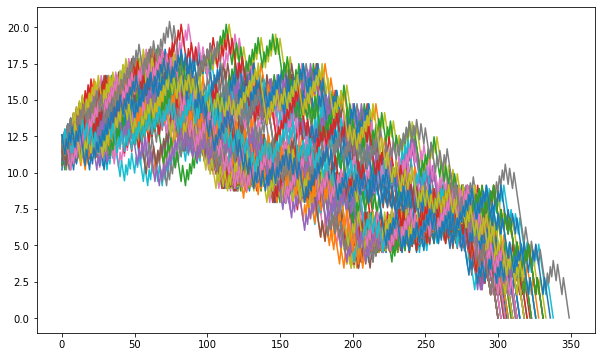

In [33]:
plot_seqseqs(100000, thresh=300, log=True)

---